In [1]:
import numpy as np 
import matplotlib.pyplot as plt

#import stats
from scipy import stats

import random as rnd
import matplotlib.colors as colors


In [2]:
#import Vele data
#it has 2 colums with data N and South
file_name = "../Data4Analysis/ch00_B0833-45_20150612_191438_010_4.txt"
#file_name = "./Data4Analysis/ch00_B0833-45_20150612_191438_011/ch00_B0833-45_20150612_191438_011_3"
data = np.loadtxt(file_name, skiprows=1)

# convert it into two arrays Noth and South
N_data = data[:,0]
S_data = data[:,1]



In [3]:
def read_full(file):
    # Read binary file as 32-bit integers and reshape to 2 columns (North, South)
    temp_data = np.fromfile(file, dtype=np.int8 ).reshape(-1, 2)
    # Remove any rows with NaN values (if any)
    clean_data = temp_data[~np.isnan(temp_data).any(axis=1)]
    north_clean = clean_data[:,0]
    south_clean = clean_data[:,1]
    return north_clean, south_clean

    # north = temp_data[:, 0]
    # south = temp_data[:, 1]
    # return north, south


# file = "./Data4Analysis/ch00_B0833-45_snip_20150612_191438_011.mbr"
# N_data, S_data = read_full(file)



In [4]:
# N_data = data[:,0]
print(N_data)

# S_data = data[:,1]
print(S_data)

# print(len(N_data))
# print(len(S_data))

# print(f"Time = {len(N_data)/33}")
# print(f"Time = {len(S_data)/33}")

[-42.   7.  30. ...  35. -36.  17.]
[  7.  22. -82. ...   4.  16. -32.]


North Signal mean =  3.279
North Signal std =  28.303907133115032


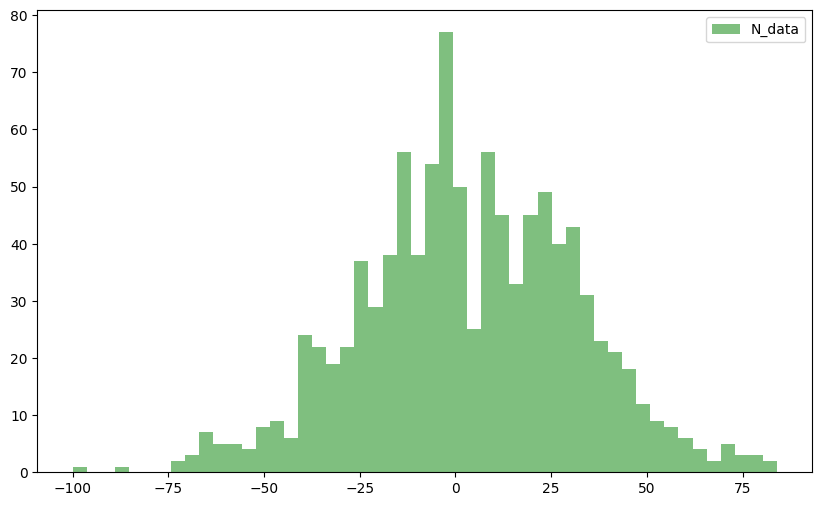

South Signal mean =  -0.157
South Signal std =  30.445563732668838


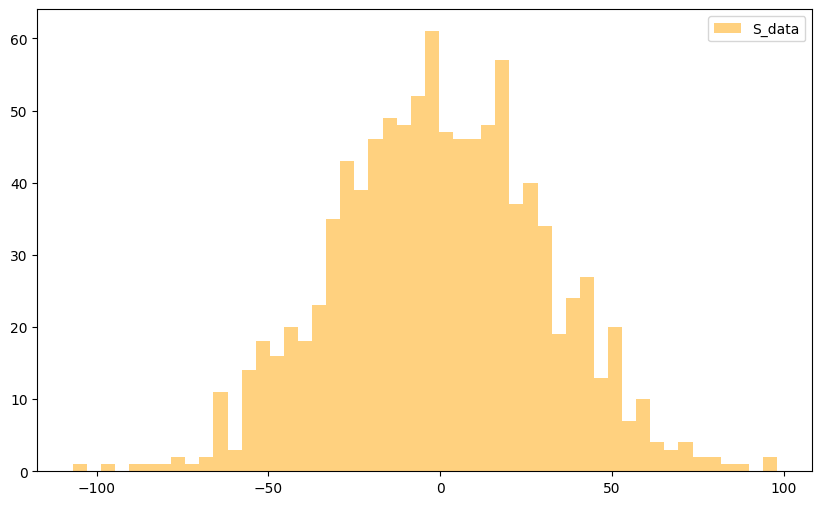

In [5]:
#Randomely selecting a part of data
N_Sample = rnd.sample(list(N_data), 1000)
S_Sample = rnd.sample(list(S_data), 1000)

#ploting histogram of data

print("North Signal mean = ", np.mean(N_Sample))
print("North Signal std = ", np.std(N_Sample))

plt.figure(figsize=(10, 6))
plt.hist(N_Sample, bins=50, alpha=0.5, color = 'green',label='N_data')
plt.legend(loc='upper right')
plt.show()

print("South Signal mean = ", np.mean(S_Sample))
print("South Signal std = ", np.std(S_Sample))

plt.figure(figsize=(10, 6))
plt.hist(S_Sample, bins=50, alpha=0.5, color = 'orange',label='S_data')
plt.legend(loc='upper right')
plt.show()

In [6]:
#Scalling the Data
N_Scaled_Data = (N_data-np.mean(N_data))/np.std(N_data)
S_Scaled_Data = (S_data-np.mean(S_data))/np.std(S_data)

In [7]:
# Performing a Student T test to see if its Gaussian
# making a Gaussian data set
N_Scaled_Sample = (N_Sample-np.mean(N_Sample))/np.std(N_Sample)
N_Gaussian = np.random.normal(0, 1, len(N_Scaled_Sample))
#S_Gaussian = np.random.normal(0, 1, 100000)

t_stat, p_val = stats.ttest_ind(N_Scaled_Sample, N_Gaussian)
print("t_stat = ", t_stat)
print("p_val = ", p_val)

if p_val < 0.05:
    print("North data is not Gaussian")
else:
    print("North data is Gaussian")

S_Scaled_Sample = (S_Sample-np.mean(S_Sample))/np.std(S_Sample)
S_Gaussian = np.random.normal(0, 1, len(S_Scaled_Sample))

t_stat, p_val = stats.ttest_ind(S_Scaled_Sample, S_Gaussian)
print("t_stat = ", t_stat)
print("p_val = ", p_val)

if p_val < 0.05:
    print("South data is not Gaussian")
else:
    print("South data is Gaussian")



t_stat =  -0.6154370897013594
p_val =  0.5383361962460695
North data is Gaussian
t_stat =  -0.4036096049320264
p_val =  0.6865430116062786
South data is Gaussian


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch, csd, coherence, correlate

def analyze_channels(ch1,ch2, fs, label=""):

    n = len(ch1)

    # Compute Power Spectral Densities
    f, Pxx_ch1 = welch(ch1, fs, nperseg=1024)
    _, Pxx_ch2 = welch(ch2, fs, nperseg=1024)

    # Cross Power Spectral Density
    _, Pxy = csd(ch1, ch2, fs, nperseg=1024)

    # Coherence
    _, coh = coherence(ch1, ch2, fs, nperseg=1024)

    # Cross-Correlation
    lags = np.arange(-n + 1, n)
    cross_corr = correlate(ch1 - np.mean(ch1), ch2 - np.mean(ch2), mode='full') / n
    time_lags = lags / fs

    # Plotting
    fig, axs = plt.subplots(3, 2, figsize=(14, 12))
    fig.suptitle(f'Channel Analysis: {label}', fontsize=16)

    # Scatter plot
    axs[0, 0].scatter(ch1, ch2, alpha=0.5, s=10, color='royalblue')
    axs[0, 0].set_xlabel('Channel 1 (V)')
    axs[0, 0].set_ylabel('Channel 2 (V)')
    axs[0, 0].set_title('Scatter Plot: Ch1 vs Ch2')
    #equal axis
    axs[0, 0].set_aspect('equal', adjustable='box')
    axs[0, 0].grid(True)

    # Power Spectral Densities
    axs[0, 1].semilogy(f, Pxx_ch1, label='Ch1', color='darkgreen')
    axs[0, 1].semilogy(f, Pxx_ch2, label='Ch2', color='orange')
    axs[0, 1].set_title('Power Spectral Densities')
    axs[0, 1].set_xlabel('Frequency (Hz)')
    axs[0, 1].set_ylabel('Power (dB)')
    axs[0, 1].legend()
    axs[0, 1].grid(True)

    # Cross Power Spectrum
    axs[1, 0].plot(f, np.abs(Pxy), color='crimson')
    axs[1, 0].set_title('Cross Power Spectral Density')
    axs[1, 0].set_xlabel('Frequency (Hz)')
    axs[1, 0].set_ylabel('|Pxy(f)|')
    axs[1, 0].grid(True)

    # Cross-Correlation
    axs[1, 1].plot(time_lags, cross_corr, color='teal')
    axs[1, 1].set_title('Cross-Correlation (Time Domain)')
    #plot the peak lagtime and put a label 
    peak_lag = time_lags[np.argmax(np.square(cross_corr))] * 10**6
    axs[1, 1].plot(peak_lag/10**6, abs(cross_corr[np.argmax(np.square(cross_corr))]), color='red', marker='o',label=f'Peak at Lag: {peak_lag:.4f} micro sec')
   # axs[1, 1].axvline(x=peak_lag/10**6, color='red', linestyle='--', label=f'Peak at Lag: {peak_lag:.2f} micro sec')
    axs[1, 1].set_xlabel('Lag Time (s)')
    axs[1, 1].set_ylabel('Correlation')
    axs[1, 1].legend()
    axs[1, 1].grid(True)

    # Coherence
    axs[2, 0].plot(f, coh, color='purple')
    axs[2, 0].set_title('Coherence vs Frequency')
    axs[2, 0].set_xlabel('Frequency (Hz)')
    axs[2, 0].set_ylabel('Coherence')
    axs[2, 0].set_ylim(0, 1.05)
    axs[2, 0].grid(True)

    # Turn off last unused subplot
    axs[2, 1].axis('off')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


/tmp/ipykernel_28781/1147412699.py:76: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])


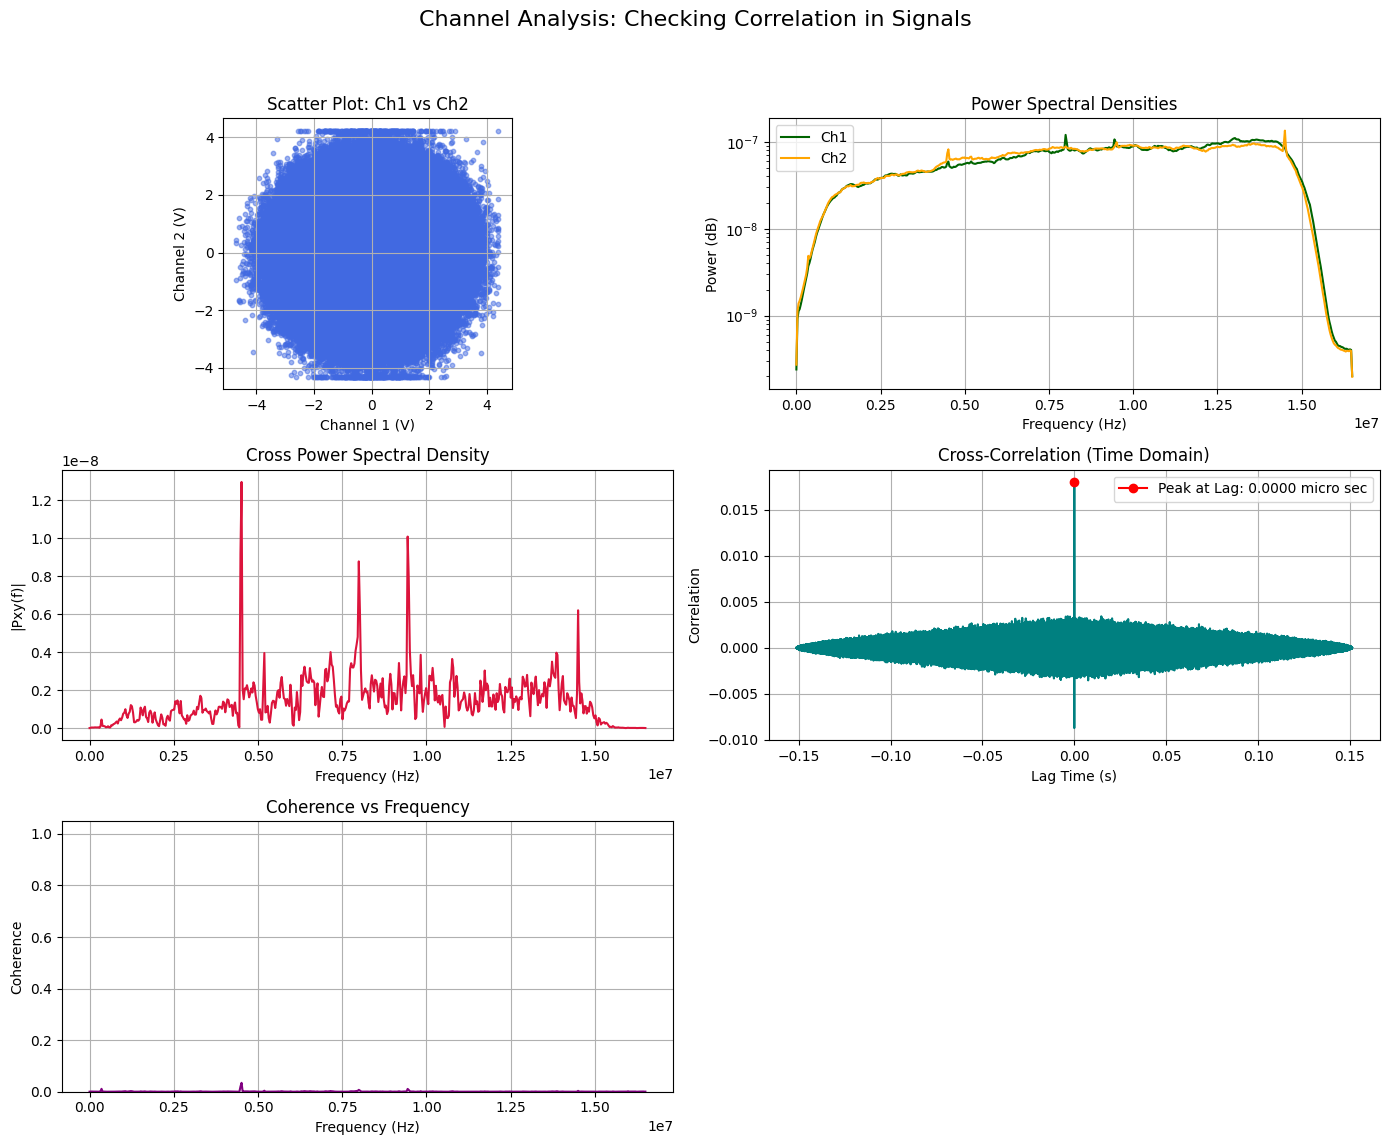

In [9]:
fs = 33e6 # Sampling frequency
N_Sample = N_data[10000:5000000]  # Use the first 100000 samples for analysis
S_Sample = S_data[10000:5000000]  # Use the first 100000 samples for analysis
N_Scaled_Sample = (N_Sample-np.mean(N_Sample))/np.std(N_Sample)
S_Scaled_Sample = (S_Sample-np.mean(S_Sample))/np.std(S_Sample)

analyze_channels(N_Scaled_Sample,S_Scaled_Sample, fs, label="Checking Correlation in Signals") 


# Step 1 : taking 512 points (from a chosen column) at a time, Fourier transforming them

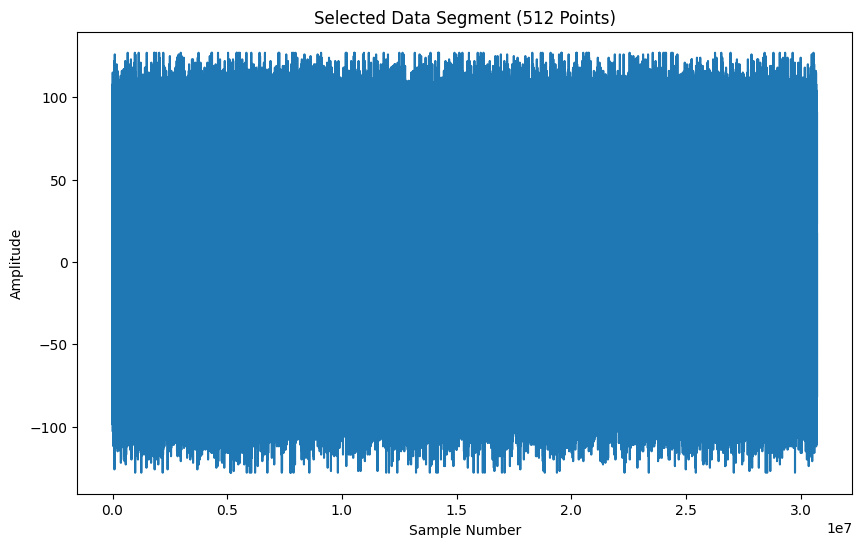

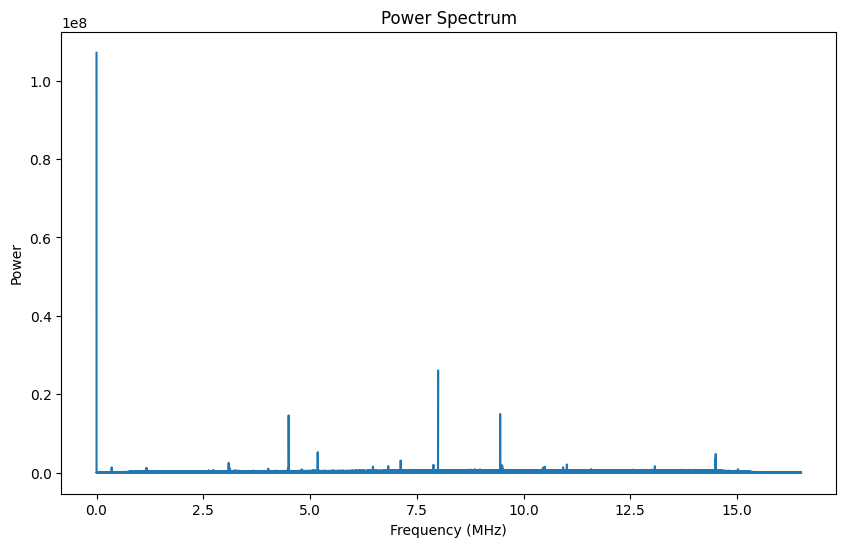

In [10]:
# Take 512 points from the chosen column
N_choosen = N_data[:]

# Plot the selected data segment
plt.figure(figsize=(10, 6))
plt.plot(N_choosen)
plt.title("Selected Data Segment (512 Points)")
plt.xlabel("Sample Number")
plt.ylabel("Amplitude")
plt.show()

# Perform Fourier Transform
N_fft = np.fft.fft(N_choosen)
N_freq = np.fft.fftfreq(len(N_choosen), d=1/33)  # d=1/33 for microsecond scale

# Take only positive frequencies
half_index = len(N_choosen) // 2
N_fft_half = N_fft[:half_index]
N_freq_half = N_freq[:half_index]

# Compute modulus-square for power spectrum
power_spectrum = np.abs(N_fft_half) #** 2

# Plot power spectrum
plt.figure(figsize=(10, 6))
plt.plot(N_freq_half, power_spectrum)
plt.title("Power Spectrum")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Power")
plt.show()


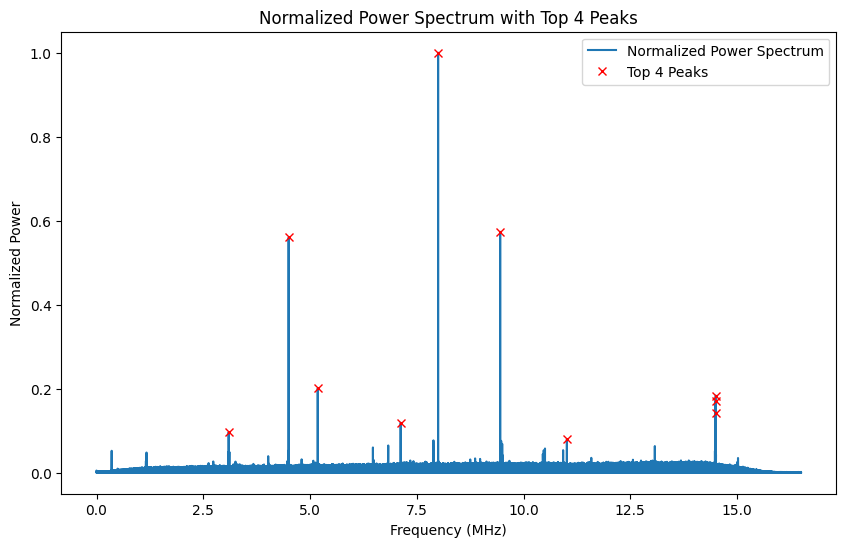

Peak Frequency: 8.00 MHz, Normalized Power: 1.00, Period = 125.00 ms
Peak Frequency: 9.45 MHz, Normalized Power: 0.57, Period = 105.78 ms
Peak Frequency: 4.50 MHz, Normalized Power: 0.56, Period = 222.23 ms
Peak Frequency: 5.18 MHz, Normalized Power: 0.20, Period = 193.01 ms
Peak Frequency: 14.50 MHz, Normalized Power: 0.18, Period = 68.96 ms
Peak Frequency: 14.50 MHz, Normalized Power: 0.17, Period = 68.97 ms
Peak Frequency: 14.50 MHz, Normalized Power: 0.14, Period = 68.95 ms
Peak Frequency: 7.12 MHz, Normalized Power: 0.12, Period = 140.38 ms
Peak Frequency: 3.10 MHz, Normalized Power: 0.10, Period = 323.10 ms
Peak Frequency: 11.02 MHz, Normalized Power: 0.08, Period = 90.78 ms


In [11]:
# Finding the peak Frequency N_freq_half, power_spectrum
# using find peaks from scipy.signal only top 4 peaks
from scipy.signal import find_peaks

# Remove zero frequency (DC component)
N_freq_half_nozero = N_freq_half[1:]
power_spectrum_nozero = power_spectrum[1:]

# Normalize the power spectrum
power_spectrum_norm = power_spectrum_nozero / np.max(power_spectrum_nozero)

# Find all peaks with normalized height > 0.5
peaks, properties = find_peaks(power_spectrum_norm, height=0.05)

# Get the top 4 peaks by height
if len(peaks) > 0:
    peak_heights = properties['peak_heights']
    top_indices = np.argsort(peak_heights)[-10:][::-1]  # Indices of top 4 peaks
    top_peaks = peaks[top_indices]
    top_heights = peak_heights[top_indices]
else:
    top_peaks = np.array([])
    top_heights = np.array([])

# Plotting the normalized power spectrum with top 4 peaks
plt.figure(figsize=(10, 6))
plt.plot(N_freq_half_nozero, power_spectrum_norm, label='Normalized Power Spectrum')
if len(top_peaks) > 0:
    plt.plot(N_freq_half_nozero[top_peaks], power_spectrum_norm[top_peaks], "x", label='Top 4 Peaks', color='red')
plt.title("Normalized Power Spectrum with Top 4 Peaks")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Normalized Power")
plt.legend()
plt.show()

# Print the top 4 peak frequencies and their corresponding normalized power values
for peak in top_peaks:
    print(f"Peak Frequency: {N_freq_half_nozero[peak]:.2f} MHz, Normalized Power: {power_spectrum_norm[peak]:.2f}, Period = {1000/N_freq_half_nozero[peak]:.2f} ms")


In [ ]:
# Now folding the N data at a period list and seeing how it looks by making a plot
# Define the period list
period_list = [90.78,323,1,140,68.95,193,125]  # in milli seconds

# Convert periods to seconds
periods_seconds = [p / 1000 for p in period_list]

# foldig the data and ploting the folded data
def fold_data(data, period, fs):
    n_samples = int(fs*period)  # Number of samples in one period
    line = np.arange(0, len(data), n_samples, dtype=int)
    # Only sum segments that fit fully in the data
    segment = np.zeros(n_samples)
    for i in range(len(line)-1):
        segment += data[line[i]:line[i+1]]
    return segment

def plot_folded_data(folded_data, period, fs):
    plt.figure(figsize=(10, 6))
    for i, segment in enumerate(folded_data):
        plt.plot(segment + i * 0.1, label=f'Segment {i+1}')  # Offset each segment for visibility
    plt.title(f'Folded Data at Period {period} ms')
    plt.xlabel('Sample Number')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True)
    plt.show()
    
fs = 33e6  # Sampling frequency in Hz
for period in periods_seconds:
    folded_data = fold_data(N_data, period, fs)
    plot_folded_data(folded_data, period, fs)  # Convert period back to ms for title

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def fold_data(data, period_s, fs):
    """
    Folds the time series data at the given period.
    
    Args:
        data (1D array): Raw voltage or power time series.
        period_s (float): Period in seconds.
        fs (float): Sampling rate in Hz.

    Returns:
        folded_matrix (2D array): Each row is one period.
        folded_mean (1D array): Mean profile over all folds.
    """
    samples_per_period = int(fs * period_s)
    n_periods = len(data) // samples_per_period
    reshaped = data[:n_periods * samples_per_period].reshape(n_periods, samples_per_period)
    folded_mean = np.mean(reshaped, axis=0)
    return reshaped, folded_mean

def plot_folded(folded_matrix, folded_mean, period_ms):
    plt.figure(figsize=(10, 6))
    plt.imshow(folded_matrix, aspect='auto', cmap='viridis', origin='lower')
    plt.colorbar(label="Amplitude")
    plt.xlabel("Sample within Period")
    plt.ylabel("Fold Index")
    plt.title(f"Folded Raw Data at Period {period_ms:.2f} ms")
    plt.tight_layout()
    plt.show()

    # Also plot the mean profile
    plt.figure(figsize=(8, 4))
    plt.plot(folded_mean, color='darkblue')
    plt.xlabel("Sample within Period")
    plt.ylabel("Average Amplitude")
    plt.title(f"Mean Folded Profile at {period_ms:.2f} ms")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Parameters
fs = 33e6  # Hz
period_list_ms = [90.78, 323, 1, 140, 68.95, 193, 125]  # ms

for period_ms in period_list_ms:
    period_s = period_ms / 1000
    folded_matrix, folded_mean = fold_data(N_data, period_s, fs)
    plot_folded(folded_matrix, folded_mean, period_ms)


In [ ]:
# Take 512 points from the chosen column
N_choosen = S_data[0:512]

# Plot the selected data segment
plt.figure(figsize=(10, 6))
plt.plot(N_choosen)
plt.title("Selected Data Segment (512 Points)")
plt.xlabel("Sample Number")
plt.ylabel("Amplitude")
plt.show()

# Perform Fourier Transform
N_fft = np.fft.fft(N_choosen)
N_freq = np.fft.fftfreq(len(N_choosen), d=1/33)  # d=1/33 for microsecond scale

# Take only positive frequencies
half_index = len(N_choosen) // 2
N_fft_half = N_fft[:half_index]
N_freq_half = N_freq[:half_index]

# Compute modulus-square for power spectrum
power_spectrum = np.abs(N_fft_half) ** 2

# Plot power spectrum
plt.figure(figsize=(10, 6))
plt.plot(N_freq_half, power_spectrum)
plt.title("Power Spectrum")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Power")
plt.show()

# Bin the fft plot set a moving avrage as to smoothen the plot
def bin_data(data, bin_size):
    binned_data = []
    for i in range(0, len(data), bin_size):
        binned_data.append(np.mean(data[i:i+bin_size]))
    return binned_data

# Bin the power spectrum
bin = 1
binned_power_spectrum = bin_data(power_spectrum, bin)
binned_freq = bin_data(N_freq_half, bin)

#plot
plt.figure(figsize=(10, 6))
plt.plot(binned_freq, binned_power_spectrum)
plt.title("Binned Power Spectrum")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Power")
plt.show()



In [ ]:
end = 512
step = 512
start = 0

#Scalling the Data
N_Scaled_Data = (N_data-np.mean(N_data))/np.std(N_data)
S_Scaled_Data = (S_data-np.mean(S_data))/np.std(S_data)


N_choosen = N_Scaled_Data[start:end]
start = start + len(N_choosen)
end = end + len(N_choosen)
N_fft = np.fft.fft(N_choosen)
N_freq = np.fft.fftfreq(len(N_choosen), d=1/33)  # d=1/33 for microsecond scale

N_fft_final = N_fft
N_fft_final_freq = N_freq

while end <= len(S_data):
    N_choosen = N_Scaled_Data[start:end]
    start = start + len(N_choosen)
    end = end + len(N_choosen)
    N_fft = np.fft.fft(N_choosen)
    N_fft_final = (N_fft_final[:]+N_fft[:])/2

# Take only positive frequencies
half_index = len(N_choosen) // 2
N_fft_half = N_fft_final[:half_index]
N_freq_half = N_fft_final_freq[:half_index]

# Compute modulus-square for power spectrum
power_spectrum = np.abs(N_fft_half) ** 2

# Plot power spectrum
plt.figure(figsize=(10, 6))
plt.plot(N_freq_half, power_spectrum)
plt.title("Power Spectrum")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Power")
plt.show()

# take a moving avrage of power spectra


In [ ]:
512*256

In [ ]:
M = 60 
N_points = 512 

# Ensure that the total dataset is a multiple of (M * N_points)
num_segments = len(N_data) // (M * N_points)
N_data_trimmed = N_data[:num_segments * M * N_points] 

# Reshape data into (num_segments * M, N_points)
N_data_reshaped = N_data_trimmed.reshape(num_segments * M, N_points)

# Compute FFT and power spectra for each 512-point segment
power_spectra = np.abs(np.fft.fft(N_data_reshaped, axis=1))[:, :N_points // 2] ** 2  # Only +ve freq

# Average every M power spectra
power_spectra_avg = power_spectra.reshape(num_segments, M, N_points // 2).mean(axis=1)

# Stack into a 2D matrix (time vs frequency)
intensity_matrix = power_spectra_avg

# Plot the intensity matrix as an image
plt.figure(figsize=(10, 6))
plt.imshow(intensity_matrix.T, aspect='auto', origin='upper', cmap='cividis',
           extent=[0, num_segments * (M * N_points / 33)* 10**-6, N_points // 2,0])
plt.colorbar(label="Power")
plt.xlabel("Time (microseconds)")
plt.ylabel("Frequency Channel")
plt.title("Power Spectra Over Time")
plt.show()

plt.figure(figsize=(10, 6))
plt.imshow(np.log1p(intensity_matrix.T), aspect='auto', origin='upper', cmap='turbo', norm=colors.PowerNorm(gamma=3),
           extent=[0, num_segments * (M * N_points / 33) * 10**-6, N_points // 2,0])
plt.colorbar(label="Power")
plt.xlabel("Time (seconds)")
plt.ylabel("Frequency Channel")
plt.title("Power Spectra Over Time")
plt.show()

In [ ]:
def Make_frequency_plot(N_data):
    M = 60 
    N_points = 512 

    # Ensure that the total dataset is a multiple of (M * N_points)
    num_segments = len(N_data) // (M * N_points)
    N_data_trimmed = N_data[:num_segments * M * N_points] 

    # Reshape data into (num_segments * M, N_points)
    N_data_reshaped = N_data_trimmed.reshape(num_segments * M, N_points)

    # Compute FFT and power spectra for each 512-point segment
    power_spectra = np.abs(np.fft.fft(N_data_reshaped, axis=1))[:, :N_points // 2] ** 2  # Only +ve freq

    # Average every M power spectra
    power_spectra_avg = power_spectra.reshape(num_segments, M, N_points // 2).mean(axis=1)
    power_spectra_avg_1d = power_spectra_avg.mean(axis=0)

    # Stack into a 2D matrix (time vs frequency)
    intensity_matrix = power_spectra_avg

    # Plot the intensity matrix as an image
    plt.figure(figsize=(10, 6))
    plt.imshow(intensity_matrix.T, aspect='auto', origin='upper', cmap='cividis',
            extent=[0, num_segments * (M * N_points / 33)* 10**-6, N_points // 2,0])
    plt.colorbar(label="Power")
    plt.xlabel("Time (microseconds)")
    plt.ylabel("Frequency Channel")
    plt.title("Power Spectra Over Time")
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.imshow(np.log1p(intensity_matrix.T), aspect='auto', origin='upper', cmap='turbo', norm=colors.PowerNorm(gamma=3),
            extent=[0, num_segments * (M * N_points / 33) * 10**-6, N_points // 2,0])
    plt.colorbar(label="Power")
    plt.xlabel("Time (seconds)")
    plt.ylabel("Frequency Channel")
    plt.title("Power Spectra Over Time")
    plt.show()

    # You can control this cutoff percentage (e.g. top 1% = 99th percentile)
    cutoff_percentile = 99.5  # change this to what you want
    log_matrix = np.log1p(intensity_matrix.T)
    vmin, vmax = np.percentile(log_matrix, [75, 100])

    plt.imshow(log_matrix,
           aspect='auto',
           origin='upper',
           cmap='turbo',
           norm=colors.Normalize(vmin=vmin, vmax=vmax),
           extent=[0, num_segments * (M * N_points / 33) * 1e-6, N_points // 2, 0])
    plt.colorbar(label='Log Intensity')
    plt.title(f"Dynamic Spectrum (Top {100 - cutoff_percentile:.1f}% dimmed)")
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency Channels")
    plt.show()


        # Take only positive frequencies
    #freq = np.fft.fftfreq(len(N_data), d=1/33)  # d=1/33 for microsecond scale
    #half_index = len(N_choosen) // 2
    #N_fft_half = N_fft_final[:half_index]
    #N_freq_half = [:half_index]

    # Plot power spectrum
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(power_spectra_avg_1d)), power_spectra_avg_1d) 
    plt.title("Power Spectrum")
    plt.xlabel("Channel")
    plt.ylabel("Power")
    plt.show()

#N_Scaled_Data = (N_data-np.mean(N_data))/np.std(N_data)

Make_frequency_plot(N_data)
Make_frequency_plot(S_data)

In [ ]:
M = 60  # Corresponds to 1 ms resolution
N_points = 512  # Number of points per FFT

# Ensure that the total dataset is a multiple of (M * N_points)
num_segments = len(S_data) // (M * N_points)
S_data_trimmed = S_data[:num_segments * M * N_points]  # Trim extra data

# Reshape data into (num_segments * M, N_points)
S_data_reshaped = S_data_trimmed.reshape(num_segments * M, N_points)

# Compute FFT and power spectra for each 512-point segment
power_spectra = np.abs(np.fft.fft(S_data_reshaped, axis=1))[:, :N_points // 2] ** 2  # Only +ve freq

# Average every M power spectra
power_spectra_avg = power_spectra.reshape(num_segments, M, N_points // 2).mean(axis=1).mean(axis=0)

plt.figure(figsize=(10, 6))
plt.plot(range(len(power_spectra_avg))[1:],power_spectra_avg[1:])
plt.yscale('log')
plt.title("Power Spectrum")
plt.xlabel("Frequency Channel")
plt.ylabel("Power")
plt.show()

In [ ]:
# Bin the power spectrum
bin = 1
binned_power_spectrum = bin_data(power_spectrum, bin)
binned_freq = bin_data(N_freq_half, bin)

#plot
plt.figure(figsize=(10, 6))
plt.plot(binned_freq, power_spectra_avg)
plt.title("Binned Power Spectrum")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Power")
plt.show()

In [ ]:
# Compute FFT and power spectra for each 512-point segment
power_spectra = np.abs(np.fft.fft(N_data_reshaped, axis=1))[:, :N_points // 2] ** 2  # Only +ve freq

# Average every M power spectra
power_spectra_avg = power_spectra.reshape(num_segments, M, N_points // 2).mean(axis=1)

"cividis" → Good for colorblind accessibility, smooth transitions.
"plasma" → Bright, perceptually uniform.
"magma" → Dark background, high contrast.
"turbo" → More vibrant colors.